<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M1_AST_04_Optimization_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Assignment 04:  Optimization

## Learning Objectives

At the end of the experiment, you will be able to

* understand constrained optimizations.
* implement various methods.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2419592" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9845319358" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_04_Optimization_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Information

**Notebook to demonstrate SciPY optimization methods**

Mathematical optimization is at the heart of solutions to major business problems in engineering, finance, healthcare, socioeconomic affairs. Pretty much all business problems boil down to minimization of some kind of resource cost or maximization of some kind of profit given other constraints.

An optimization process is also the soul of operation research, which is intimately related to modern data-driven business analytics. In this manner, it is also closely related to the data science pipeline, employed in virtually all businesses today.

Although much has been written about the data wrangling and predictive modeling aspects of a data science project, the final frontier often involves solving an optimization problem using the data-driven models which can improve the bottom-line of the business by reducing cost or enhancing productivity.

Python has become the de-facto lingua franca of analytics, data science, and machine learning. Therefore, it makes sense to discuss optimization packages and frameworks within the Python ecosystem.

We cover optimization algorithms available within the SciPy ecosystem. SciPy is the most widely used Python package for scientific and mathematical analysis and it is no wonder that it boasts of powerful yet easy-to-use optimization routines for solving complex problems.

For more information see :  [Scipy Optimization Reference Guide](https://scipy.github.io/devdocs/tutorial/optimize.html#id20)

### Import the required Packages

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

### Minimize a simple scalar function:

$f(x) = sin(x)*exp[-0.1(x - 0.6)^2]$

In [5]:
def scalar1(x):
    # YOUR CODE HERE: To return the function
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)


In [6]:
def plot_nice(x,y,title=None,xlabel='x',ylabel='y',show=True):
    #plt.figure(figsize=(8,5))
    if title!=None:
        plt.title(str(title)+'\n',fontsize=18)
    # YOUR CODE HERE: Plot the x and y with xticks, yticks, xlabel and ylabel
    plt.plot(x,y,color='k',lw=3)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    if show:
        plt.show()

In [10]:
x = np.arange(-10,10,0.05)
# YOUR CODE HERE: to creates a NumPy array containing values from -10 to 10 with a step size of 0.05.


In [11]:
y = scalar1(x) # YOUR CODE HERE: To Create scalar value of x

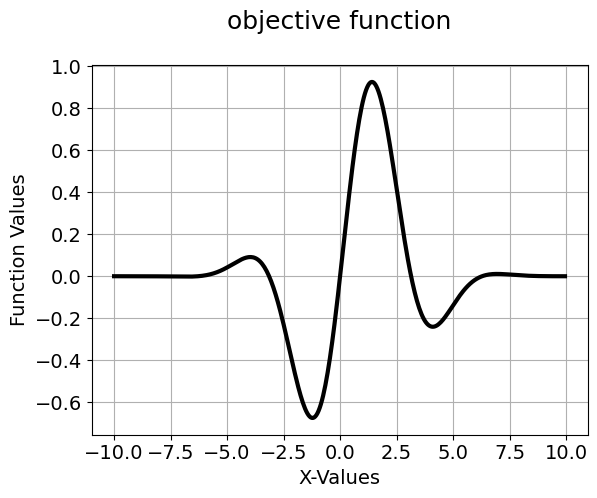

In [12]:
# YOUR CODE HERE: Plot x and y with xlabels and ylabels
plot_nice(x,y,title="objective function",xlabel="X-Values",ylabel="Function Values")

The code to determine the global minimum is extremely simple with SciPy. We can use the minimize_scalar function in this case.

Use `optimize.minimize_scalar()` method

In [13]:
result = optimize.minimize_scalar(scalar1)
# YOUR CODE HERE : To  determine global minima of scalar1 using scipy
result['success']

True

The value at which the minimum is reached is stored in the result['x'] variable.

In [14]:
print("Minimum occurs at: ",result['x'])

Minimum occurs at:  -1.2214484245210282


In [15]:
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.6743051024666711
       x: -1.2214484245210282
     nit: 10
    nfev: 14


### Bounded search (bound on the independent variable)

The code above accomplished what is called unconstrained/unbounded optimization i.e. no restriction of any kind was imposed on the problem. However, most practical optimization problems involve complex constraints. A simple example of that is bound on the independent variable (x).

As we can see that this function is characterized by two minima, the result would be different if we only considered the positive values of x. The code to search with bound is only slightly different from above.

In [17]:
#For method ‘bounded’, bounds is mandatory and must have two finite items corresponding to the optimization bounds.
result = optimize.minimize_scalar(scalar1,bounds=(0,10), method='Bounded')
# YOUR CODE HERE: TO use minimize_scalar function with the method 'bounded' and two finite items

we have to pass on the bounds argument with a suitable tuple containing the minimum and maximum bounds and use the `method='Bounded'` argument.

In [18]:
print("When bounded between 0 and 10, minimum occurs at: ",result['x'])

When bounded between 0 and 10, minimum occurs at:  4.101466164987216



### Constraints as functions inside a dictionary

$f(x)=0.5−\log10​(x^2+2)$

In [19]:
# Left-sided inequality from the first constraint
def constraint1(x):
  return 0.5-np.log10(x**2+2)
    # YOUR CODE HERE: Return the first constraint function of f(x)

$f(x)=log10​(x^2+2)−1.5$

In [20]:
# Right-sided inequality from the first constraint
def constraint2(x):
  return  np.log10(x**2+2)-1.5
    # YOUR CODE HERE: Return the second constraint function of f(x)

$f(x) = sin(x) + 0.3 x^2 − 1$

In [22]:
# Equality from the second constraint
def constraint3(x):
  return np.sin(x) + 0.3*x**2 - 1
    # YOUR CODE HERE: Return the third constraint function of f(x)

In [24]:
# Construct dictionaries
# YOUR CODE HERE: To construct dictionaries of constraints
con1= {'type': 'ineq', 'fun': constraint1}
con2= {'type': 'ineq', 'fun': constraint2}
con3= {'type': 'eq', 'fun': constraint3}

In [25]:

# YOUR CODE HERE: put those dictionaries into a tuple
cons = (con1,con2,con3)

### Choosing a suitable method

we can run the optimization by choosing a suitable method which supports constraints (not all methods in the minimize function support constraint and bounds). Here we chose SLSQP method which stands for sequential least-square quadratic programming.

[method: 'SLSQP'](https://scipy.github.io/devdocs/tutorial/optimize.html#sequential-least-squares-programming-slsqp-algorithm-method-slsqp)

Furthermore, to use minimize we need to pass on an initial guess in the form of x0 argument. Suppose, we pass on x0=0 for a trial run.

In [26]:
#Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
result = optimize.minimize(scalar1,x0=0,method='SLSQP',constraints=cons,options={'maxiter':100})
# YOUR CODE HERE: To use optimize.minimize by passing the scalar function and argumrnt with the method and constraints, option.
print(result)

 message: Iteration limit reached
 success: False
  status: 9
     fun: 0.7631695862891654
       x: [ 8.774e-01]
     nit: 100
     jac: [ 5.919e-01]
    nfev: 392
    njev: 100


If we print the result, we see something different from the simple unconstrained optimization result. Failure!

The optimization parameter success: False indicates it did not succeed in reaching the global minimum. The message is ‘Iteration limit exceeded’ i.e. it tried 101 iterations but could not reach the minimum.

The answer lies in the deep theory of the mathematical optimization (and associated algorithm) but it suffices to say that the initial guess played a big role. In general, a non-convex optimization problem has no mathematical guarantee to be solved successfully and the nature of our problem here is non-convex.

In general cases, we cannot do much. However, we already have the plot of the function and can eyeball the optimum solution. Therefore, we can just give a better initial guess to the algorithm. We give x0=-2

In [27]:
result = optimize.minimize(scalar1,x0=-2,method='SLSQP',constraints=cons,options={'maxiter':100})
# YOUR CODE HERE: To use optimize.minimize by passing the scalar function and argumrnt with the method and constraints, option.
print(result)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -0.2859494456768613
       x: [-2.376e+00]
     nit: 71
     jac: [-4.675e-01]
    nfev: 12
    njev: 6


We restrict the number of iterations performed by the algorithm? For demonstration purpose only, we severely limit the number of iteration to 3.

The result is, as expected, not favorable.

In [28]:
result = optimize.minimize(scalar1,x0=-2,method='SLSQP',constraints=cons,options={'maxiter':3})
# YOUR CODE HERE: To use optimize.minimize by passing the scalar function and argumrnt with the method and constraints, option.
print(result)

 message: Iteration limit reached
 success: False
  status: 9
     fun: -0.2854204989181714
       x: [-2.377e+00]
     nit: 3
     jac: [-4.674e-01]
    nfev: 6
    njev: 3


Note that the optimization came close to the global minimum, but did not quite reach it — of course, due to the fact that it was not allowed to iterate a sufficient number of times.

### Multi-variate case: Sum of Gaussians

**Lets see an example with a multi-valued function.**

**Maximization of a Gaussian mixture**

Often in a chemical or manufacturing process, multiple stochastic sub-processes are combined to give rise to a Gaussian mixture. It may be desirable to maximize the final resultant process output by choosing the optimum operating points in the individual sub-processes (within certain process limits).

The trick is to use a vector as the input to the objective function and to make sure the objective function still returns a single scalar value. Also, because the optimization problem here is about maximization of the objective function, we need to change the sign and return the negative of the sum of the Gaussian functions as the result of the objective function


In [ ]:
# Define the mean values for the Gaussian distributions
mu = [-1,0.3,2.1]
# Define the standard deviation values for the Gaussian distributions
sigma = [2.1,0.8,1.7]
# Create an array of zeros to accumulate the sum of the Gaussian distributions
add=np.zeros(1000)
# Create a figure for plotting
plt.figure(figsize=(8,5))
# YOUR CODE HERE: Iterate over the mean and standard deviation values using the zip function

# YOUR CODE HERE: Generate a range of values from -5 to 5 with a step size of 0.01
# YOUR CODE HERE: Calculate the Gaussian distribution for the current mean and standard deviation
# YOUR CODE HERE: Accumulate the Gaussian distribution values to the 'add' array

# YOUR CODE HERE: Plot the current Gaussian distribution

# Display the figure with all the plotted Gaussian distributions
plt.show()

In [ ]:
plot_nice(x=np.arange(-5,5,0.01),y=add)

$f(x)=exp[−(x−m)^2/(2s^2)]$

In [ ]:
def gaussian(m,s):
    x = # YOUR CODE HERE: to creates a NumPy array containing values from -5 to 5 with a step size of 0.01.
    # YOUR CODE HERE: Return the function f(x)

In [ ]:
# the mean values for the Gaussian distributions
mu = [-1,0.3,2.1]
# the standard deviation values for the Gaussian distributions
sigma = [2.1,0.8,1.7]

In [ ]:
def gaussian_mixture(x):

# Your Code HERE: Computes the resultant Gaussian mixture from an input vector and known mean, variance quantities

In [ ]:
gaussian_mixture(np.array([3,-2,2]))

The same result['x'] stores the optimum setting of the individual processes as a vector. That is the only difference between optimizing a single-valued and a multivariate function is that we get back a vector instead of a scalar.

In [ ]:
result['x']

In [ ]:
x0=np.array([0]*3)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100})
result

### Bounds with multiple variables

we can change the bounds here to reflect practical constraints. For example, if the sub-process settings can occupy only a certain range of values (some must be positive, some must be negative, etc.) then the solution will be slightly different — it may not be the global optimum.

In [ ]:
x0=np.array([0]*3)
x1_bound = (-2,2)
x2_bound = (0,5)
x3_bound = (-3,0)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100},
                           bounds=(x1_bound,x2_bound,x3_bound))
# YOUR CODE HERE: To use optimize.minimize by passing the gaussian_mixture function and argumrnt and the method and constraints,
                    # options with bounding multiple variables.
result

Here, the solution is as follows. This is dictating to push the 3rd sub-process setting to the maximum possible value (zero) while adjusting the other two suitably.

# Please answer the questions below to complete the experiment:




## $f(x)=x^3-3x^2+1$

In [ ]:
# @title For the above function find the absolute maximum and minimum values.   { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "(1, -3)", "(3, 5)","(0, 3)","(1, 5)"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")